---
title: "AM Peak travel distance skim for SOV NT"
format: 
  html: 
    toc: true
    css: styles.css
jupyter: python3
execute:
  echo: false
---

In [1]:
from util import Skim
from util import SkimCompare

In [2]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
base_skim = Skim() #no label initially
#read 5 matrices from transit AM skims
base_skim.skimReader(
    scenario_path=r'T:\STORAGE-63T\2025RP_draft\abm_runs_v2\2022_S0_v2',
    skim='traffic',
    time_periods='AM',
    desc_label='EMME 4.3.7 Base year scenario'
)

In [4]:
comp_skim = Skim()
comp_skim.skimReader(
    scenario_path=r'T:\STORAGE-63T\ABM3_EMME_upgrade\2022_v1522_toreroV2',
    skim='traffic',
    time_periods='AM',
    desc_label='OpenPaths Base year scenario'
)

In [5]:
print('Scenarios to be compared: ' + base_skim.desc_label + ' VS ' + comp_skim.desc_label)

Scenarios to be compared: EMME 4.3.7 Base year scenario VS OpenPaths Base year scenario


Scatterplot comparison of AM Peak SOV_NT distance

Intercept: 0.0039
Slope: 1.0002
R² Score: 0.9998
RMSE: 0.2638


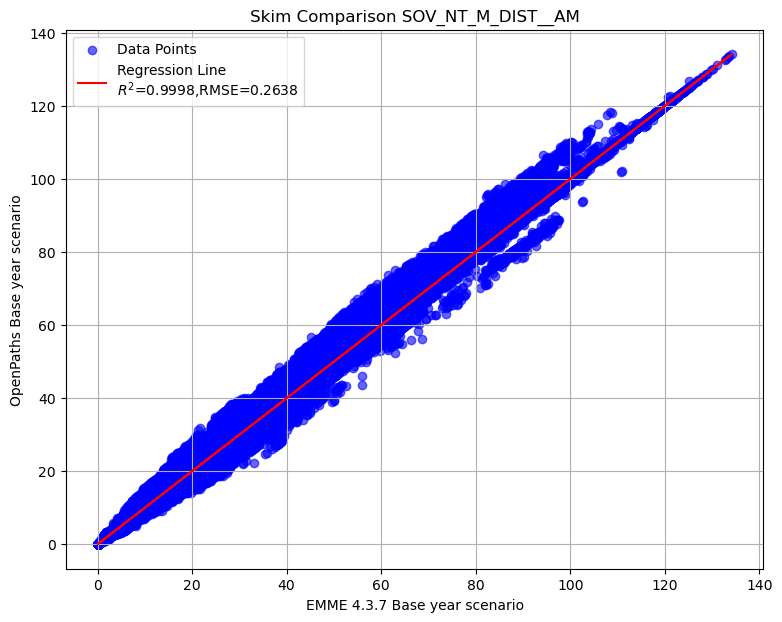

In [6]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'SOV_NT_M_DIST__AM')

In [9]:
# generate comparison
comparison = SkimCompare.comparison(base_skim.skim_df, comp_skim.skim_df)

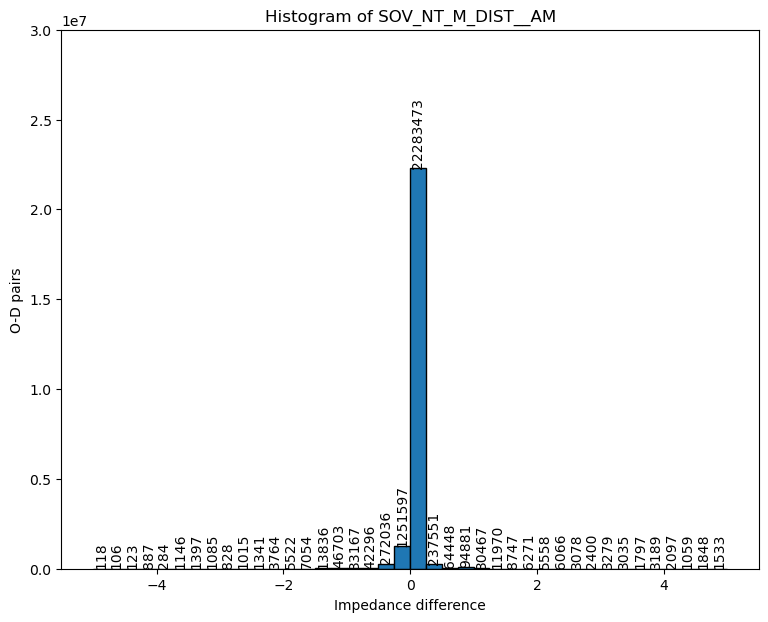

In [10]:
SkimCompare.histogram_plot('SOV_NT_M_DIST__AM',comparison)

Comparison table of select matrix from AM Peak traffic skim (top 5)

In [11]:

comparison.sort_values(by='SOV_NT_M_DIST__AM', ascending=False).head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index").format({
    'SOV_NT_M_DIST__AM': '{:,.2f}'
})

Origin,Destination,SOV_NT_M_DIST__AM
4906,1282,13.35
4907,1282,13.25
4900,1293,13.07
4901,1293,12.86
611,4905,12.58


Summary of Comparison on SOV_NT_M_DIST__AM between EMME OpenPath and EMME437

In [12]:
desc = comparison[['SOV_NT_M_DIST__AM']].describe().applymap(lambda x: f"{x:,.2f}")
print(desc)

      SOV_NT_M_DIST__AM
count     24,472,809.00
mean               0.01
std                0.26
min              -12.35
25%                0.00
50%                0.00
75%                0.00
max               13.35
